In [10]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Load & preprocessing MNIST datasets

In [11]:
def load_dataset():
	# load the mnist dataset
	(X_train, y_train), (X_test, y_test) = mnist.load_data()
 
	# reshape dataset
	X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
	X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')
 
	# one hot encode labels
	y_train = to_categorical(y_train)
	y_test = to_categorical(y_test)
	return X_train, y_train, X_test, y_test
 
def normalize_data(X_train, X_test):
	# normalize data to range 0-1
	X_train = X_train / 255.0
	X_test = X_test / 255.0

	return X_train, X_test

### Create a CNN Model

In [12]:
def create_model():
  model = Sequential()

  model.add(Conv2D(32, kernel_size = 3, activation='relu', input_shape = (28, 28, 1)))
  model.add(BatchNormalization())
  model.add(Conv2D(32, kernel_size = 3, activation='relu'))
  model.add(BatchNormalization())
  model.add(Conv2D(32, kernel_size = 5, strides=2, padding='same', activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.4))

  model.add(Conv2D(64, kernel_size = 3, activation='relu'))
  model.add(BatchNormalization())
  model.add(Conv2D(64, kernel_size = 3, activation='relu'))
  model.add(BatchNormalization())
  model.add(Conv2D(64, kernel_size = 5, strides=2, padding='same', activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.4))

  model.add(Conv2D(128, kernel_size = 4, activation='relu'))
  model.add(BatchNormalization())
  model.add(Flatten())
  model.add(Dropout(0.4))
  model.add(Dense(10, activation='softmax'))

  model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
  return model

In [13]:
def fit_model(model_name, epochs=10):
  # create a new model
  model = create_model()

  # load dataset
  X_train, y_train, X_test, y_test = load_dataset()
  # normalize data
  X_train, X_test = normalize_data(X_train, X_test)

  # fit model
  model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
  history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))
  # save model to /models folder
  model.save("./models/{0}.h5".format(model_name))

  return model, history

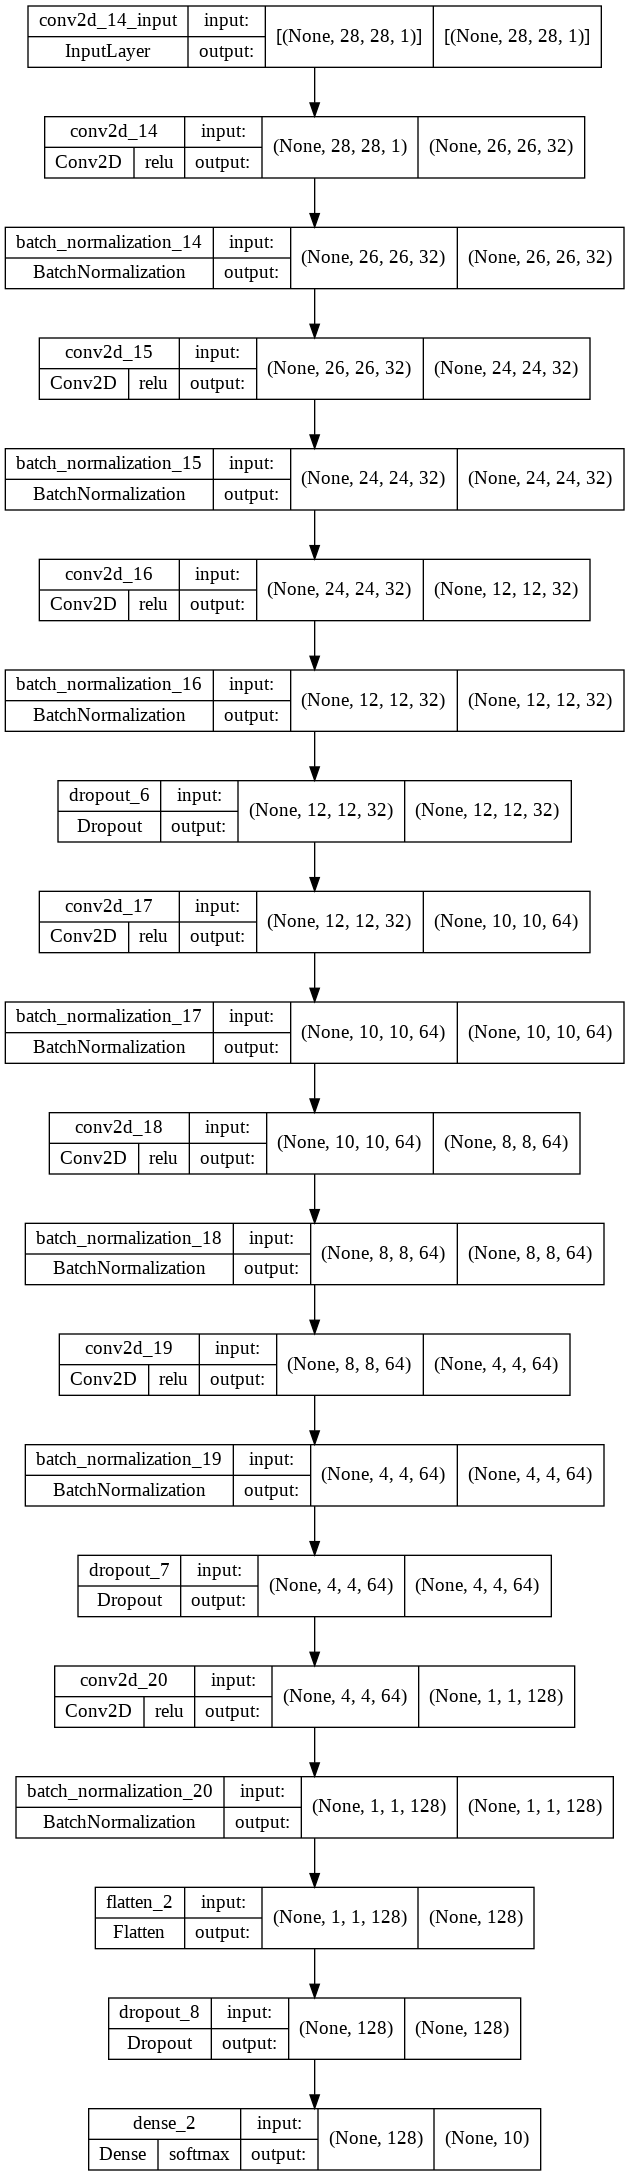

In [14]:
# plot architecture of the model
sample_model = create_model()
plot_model(sample_model, show_shapes=True, show_layer_activations=True)

## Helper function

In [15]:
def plot_history(title, history_data):

  history = history_data.history

  plt.figure(figsize=(10, 6))
  plt.plot(history['loss'], label="Loss")
  plt.plot(history['val_loss'], label="Val Loss")

  plt.xlabel("Loss value")
  plt.ylabel("Epochs")

  plt.title(title)
  plt.legend()
  plt.show()

In [16]:
def get_accuracy(model, X_test, y_test):
  _, acc = model.evaluate(X_test, y_test)
  print('Accuracy: > %.3f' % (acc * 100.0))

## Fit & save the model with epochs from 5 - 15

In [17]:
histories = []

In [18]:
for n_epochs in range(5, 16):
  model_name = "{0}_epochs_model".format(n_epochs)
  _, history = fit_model(model_name, n_epochs)
  histories.append(history)

Epoch 1/5
1875/1875 [==============================] - 13s 6ms/step - loss: 0.1759 - accuracy: 0.9468 - val_loss: 0.0357 - val_accuracy: 0.9883
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0674 - accuracy: 0.9797 - val_loss: 0.0286 - val_accuracy: 0.9898
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0560 - accuracy: 0.9831 - val_loss: 0.0236 - val_accuracy: 0.9926
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0467 - accuracy: 0.9857 - val_loss: 0.0236 - val_accuracy: 0.9926
Epoch 5/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0414 - accuracy: 0.9877 - val_loss: 0.0291 - val_accuracy: 0.9906
Epoch 1/6
1875/1875 [==============================] - 13s 6ms/step - loss: 0.1903 - accuracy: 0.9411 - val_loss: 0.0359 - val_accuracy: 0.9889
Epoch 2/6
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0706 - accuracy: 0.9790 - val_loss: 0.0324 - val_accuracy:

In [ ]:
for n_epochs in range(5, 16):
  idx = n_epochs - 5
  plot_history("History of {0}-epochs model".format(n_epochs), histories[idx])

## Prediction

### Load image function

In [20]:
from keras.preprocessing.image import load_img, img_to_array
from keras.models import load_model

def load_image(filename):
	img = load_img(filename, color_mode="grayscale", target_size=(28, 28))
	plt.imshow(img)
	plt.plot()
	img = img_to_array(img)
	# reshape into a single sample with 1 channel
	img = img.reshape(1, 28, 28, 1)
	# prepare pixel data
	img = img.astype('float32')
  # normalize data
	img = img / 255.0
	return img

### Prediction with 10-epochs model

In [23]:
def predict_with_10_epochs_model(image_file):
  img = load_image(image_file)
  # load model
  model = load_model("./models/10_epochs_model.h5")

  # predict the class
  predict_probabilities = model.predict(img).flatten()
  result = np.argmax(predict_probabilities)

  for idx, probability in np.ndenumerate(predict_probabilities):
      num = idx[0]
      print("Probability of digit {0} is {1}".format(num, probability))

  print("\nResult: digit {0}".format(result))


Probability of digit 0 is 0.014132400043308735
Probability of digit 1 is 5.360483919503167e-05
Probability of digit 2 is 0.0030799394007772207
Probability of digit 3 is 9.937501999957021e-06
Probability of digit 4 is 0.00011408139835111797
Probability of digit 5 is 0.06333309412002563
Probability of digit 6 is 0.9186539053916931
Probability of digit 7 is 8.379528298974037e-05
Probability of digit 8 is 0.00036187839577905834
Probability of digit 9 is 0.00017742335330694914

Result: digit 6


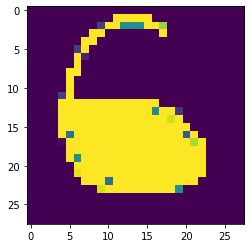

In [36]:
predict_with_10_epochs_model("./6.png")

### Predictions with multiple models

In [25]:
def predict_with_multiple_models(image_file):
  index = [i for i in range(10)]
  model_lists = ["{0} epochs".format(i) for i in range(5, 16)]
  
  df = pd.DataFrame(index=index, columns=model_lists)
  
  # load the image
  img = load_image(image_file)

  # predict the class
  for idx, model_name in enumerate(model_lists):
    n_epochs = idx + 5
    model = load_model("./models/{0}_epochs_model.h5".format(n_epochs))
    predict_probabilities = model.predict(img).flatten()
    result = np.argmax(predict_probabilities)
    for idx, probability in np.ndenumerate(predict_probabilities):
      digit = idx[0]
      df.loc[digit, model_name] = probability  

  return df

,5 epochs,6 epochs,7 epochs,8 epochs,9 epochs,10 epochs,11 epochs,12 epochs,13 epochs,14 epochs,15 epochs
0,0.000283,0.002698,0.000386,0.000377,0.000022,0.000003,0.000061,0.000046,0.000014,0.000432,0.000185
1,0.00026,0.000049,0.000017,0.000066,0.000028,0.000001,0.00001,0.000023,0.000026,0.000499,0.000259
2,0.000543,0.001875,0.000118,0.000037,0.000293,0.000001,0.000005,0.000055,0.000008,0.000118,0.000042
3,0.0175,0.029616,0.003551,0.002233,0.003629,0.000092,0.001822,0.072334,0.005601,0.069099,0.044044
4,0.000237,0.000241,0.000414,0.000024,0.000142,0.000005,0.000117,0.000016,0.000078,0.000379,0.000201
5,0.00557,0.038265,0.002119,0.029926,0.008853,0.002132,0.001458,0.08295,0.011277,0.051774,0.036653
6,0.02297,0.436835,0.001324,0.010026,0.762376,0.000223,0.006628,0.002267,0.007047,0.003065,0.008774
7,0.000086,0.000173,0.000016,0.000015,0.000103,0.0,0.000019,0.000006,0.000034,0.000093,0.000655
8,0.95252,0.49016,0.991998,0.957294,0.224541,0.997534,0.989879,0.842258,0.975909,0.874351,0.909113
9,0.000031,0.000089,0.000056,0.000003,0.000014,0.000008,0.000002,0.000045,0.000006,0.00019,0.000074


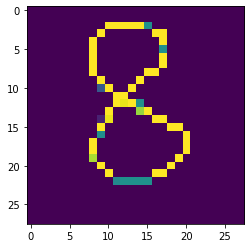

In [34]:
predict_with_multiple_models("./8.png")